In [17]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=690664a782219ec8610977c0c413b21b2b97f21433c24bf26b6236532aa9eba6
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

In [19]:
df=pd.read_csv('Market_Basket_Optimisation.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.value_counts()

0       1        2        3               4             5                 6     7               8             9             10              11         12     13     14             15      16                 17               18       19       
shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour  yams  cottage cheese  energy drink  tomato juice  low fat yogurt  green tea  honey  salad  mineral water  salmon  antioxydant juice  frozen smoothie  spinach  olive oil    1
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [22]:
df.shape

(7501, 20)

In [23]:
df.describe(include=object)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


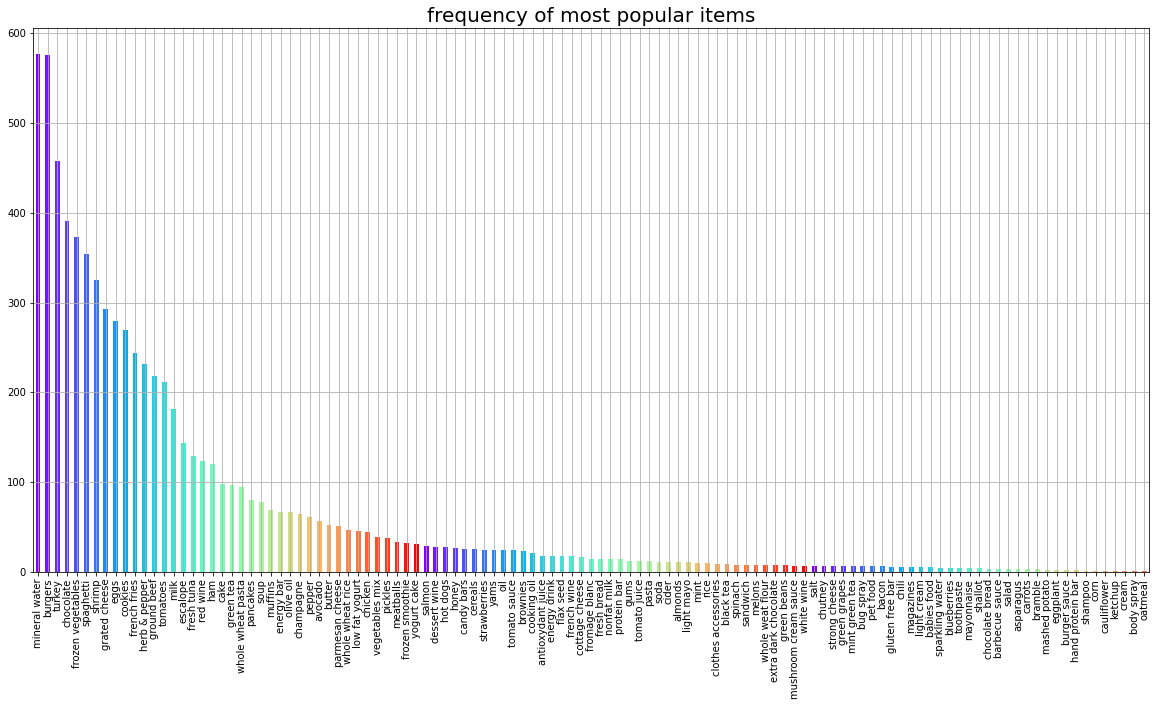

In [24]:
color=plt.cm.rainbow(np.linspace(0,1,40))
df[0].value_counts().plot.bar(color = color, figsize=(20,10))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [25]:
df.values.tolist()

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

In [36]:
trans = []
for i in range(len(df)):
    trans.append([str(df.values[i,j]) for j in range(0, 20) if str(df.values[i,j])!='nan'])

In [27]:
association_rules = apriori(trans,min_support=0.003,min_confidence=0.01,min_lift=3,min_length=2)
values = list(association_rules)
values

[RelationRecord(items=frozenset({'cottage cheese', 'brownies'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chicken'}), items_add=frozenset({'light cream'}), confidence=0.07555555555555556, lift=4.843950617283951), OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'escalope'}),

In [31]:
list=[]
for item in values:
    pair = item[0]
    items = [x for x in pair]
    list.append([str(items[0]+" -> " + items[1]),str(item[1]),str(item[2][0][2]),str(item[2][0][3])])
list

[['cottage cheese -> brownies',
  '0.0034662045060658577',
  '0.10276679841897232',
  '3.225329518580382'],
 ['chicken -> light cream',
  '0.004532728969470737',
  '0.07555555555555556',
  '4.843950617283951'],
 ['mushroom cream sauce -> escalope',
  '0.005732568990801226',
  '0.0722689075630252',
  '3.7908326967150496'],
 ['escalope -> pasta',
  '0.005865884548726837',
  '0.07394957983193277',
  '4.700811850163794'],
 ['fresh bread -> tomato juice',
  '0.004266097853619517',
  '0.09907120743034055',
  '3.2593558198902826'],
 ['fresh tuna -> honey',
  '0.003999466737768298',
  '0.17964071856287428',
  '3.7850703088205613'],
 ['fromage blanc -> honey',
  '0.003332888948140248',
  '0.2450980392156863',
  '5.164270764485569'],
 ['herb & pepper -> ground beef',
  '0.015997866951073192',
  '0.1628222523744912',
  '3.291993841134928'],
 ['tomato sauce -> ground beef',
  '0.005332622317024397',
  '0.054274084124830396',
  '3.840659481324083'],
 ['olive oil -> light cream',
  '0.00319957339021

In [32]:
df1=pd.DataFrame(list,columns=['Rule','support','confidence','lift'])
df1.head()

,Rule,support,confidence,lift
0,cottage cheese -> brownies,0.0034662045060658577,0.10276679841897232,3.225329518580382
1,chicken -> light cream,0.004532728969470737,0.07555555555555556,4.843950617283951
2,mushroom cream sauce -> escalope,0.005732568990801226,0.0722689075630252,3.7908326967150496
3,escalope -> pasta,0.005865884548726837,0.07394957983193277,4.700811850163794
4,fresh bread -> tomato juice,0.004266097853619517,0.09907120743034055,3.2593558198902826


In [33]:
df1.sort_values(by='support')

,Rule,support,confidence,lift
40,herb & pepper -> spaghetti,0.0030662578322890282,0.058524173027989825,3.5982772285487843
66,frozen vegetables -> spaghetti,0.0030662578322890282,0.03216783216783217,3.4969696969696975
20,chicken -> pancakes,0.0030662578322890282,0.051111111111111114,3.091810035842294
55,milk -> tomatoes,0.0030662578322890282,0.02366255144032922,3.4133230452674903
41,green tea -> ground beef,0.0030662578322890282,0.04483430799220273,3.0297490472929067
...,...,...,...,...
34,frozen vegetables -> shrimp,0.007199040127982935,0.07552447552447553,3.2006163328197226
10,olive oil -> whole wheat pasta,0.007998933475536596,0.12145748987854252,4.1224100976422955
51,milk -> soup,0.008532195707239034,0.16886543535620052,3.518498973907945
30,frozen vegetables -> spaghetti,0.008665511265164644,0.08819538670284939,3.165328208890303


In [34]:
df1.sort_values(by='confidence')

,Rule,support,confidence,lift
55,milk -> tomatoes,0.0030662578322890282,0.02366255144032922,3.4133230452674903
52,olive oil -> milk,0.003199573390214638,0.02469135802469136,3.0362274843149164
12,milk -> spaghetti,0.003332888948140248,0.025720164609053502,3.2154492455418384
53,olive oil -> milk,0.0035995200639914677,0.02777777777777778,3.1098673300165838
75,eggs -> milk,0.0037328356219170776,0.02880658436213992,3.177620430888405
...,...,...,...,...
9,olive oil -> light cream,0.003199573390214638,0.20512820512820515,3.1147098515519573
50,light cream -> spaghetti,0.003199573390214638,0.20512820512820515,3.4345238095238098
89,pancakes -> spaghetti,0.0030662578322890282,0.21100917431192662,3.532990661861075
6,fromage blanc -> honey,0.003332888948140248,0.2450980392156863,5.164270764485569


In [35]:
df1.sort_values(by='lift')

,Rule,support,confidence,lift
48,shrimp -> spaghetti,0.005999200106652446,0.03445635528330781,3.0053153602336264
71,milk -> mineral water,0.003332888948140248,0.14450867052023122,3.0109987154784847
36,frozen vegetables -> shrimp,0.005999200106652446,0.08395522388059701,3.013148968078269
92,shrimp -> milk,0.0030662578322890282,0.0638888888888889,3.014028651292803
70,frozen vegetables -> spaghetti,0.0041327822956939075,0.1802325581395349,3.0176884343853825
...,...,...,...,...
3,escalope -> pasta,0.005865884548726837,0.07394957983193277,4.700811850163794
1,chicken -> light cream,0.004532728969470737,0.07555555555555556,4.843950617283951
49,tomato sauce -> spaghetti,0.0030662578322890282,0.03120759837177748,4.980599901844742
6,fromage blanc -> honey,0.003332888948140248,0.2450980392156863,5.164270764485569
